In [ ]:
#hide
import ridgereliability.plots
import ridgereliability.metrics
import sklearn.model_selection
import sklearn.datasets
import sklearn.svm
import sklearn.metrics
import numpy as np

# Ridge reliability

![CI](https://github.com/MaximLippeveld/ridgereliability/workflows/CI/badge.svg)

The ridge-reliability package provides tools for assessing classifier calibration.
Visualizations:
- ridge reliability diagram,
- confidence reliability diagram.

Metrics:
- Expected Calibration Error (ECE)
- Posterior Expected balanced Accuracy-based Calibration Error (PEACE)

## Install

Install the package with:

`pip install ridgereliability`

## How to use

Below we go over some of the functionality of this package.

In [ ]:
np.random.seed(42)

We start of by generating a fake dataset for classification and splitting it in a train and test set.

In [ ]:
X, y = sklearn.datasets.make_classification(n_samples=5000, n_features=12, n_informative=3, n_classes=3)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True)

For this example we use an SVM. We fit it on the training data and generate probabilities for the test set.

In [ ]:
logreg = sklearn.svm.SVC(probability=True)
logreg.fit(X_train, y_train)
y_probs = logreg.predict_proba(X_test)

As a sanity check we compute some performance metrics.

In [ ]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_probs.argmax(axis=1))}")
print(f"Balanced accuracy: {sklearn.metrics.balanced_accuracy_score(y_test, y_probs.argmax(axis=1))}")

Accuracy: 0.808
Balanced accuracy: 0.8084048918146675


To get an insight into calibration we can look at the posterior reliability diagrams and the PEACE metric.

We can plot the diagrams aggregated over all classes:

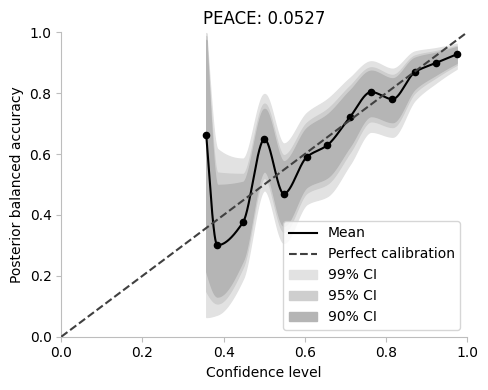

In [ ]:
ax = ridgereliability.plots.river_reliability_diagram(y_probs.max(axis=1), y_probs.argmax(axis=1), y_test, bins="fd")

peace_metric = ridgereliability.metrics.peace(y_probs.max(axis=1), y_probs.argmax(axis=1), y_test)
ax.set_title(f"PEACE: {peace_metric:.4f}")

_ = ax.legend()

Or class-wise to spot miscalibrations for particular classes:

In [ ]:
import matplotlib.pyplot as plt

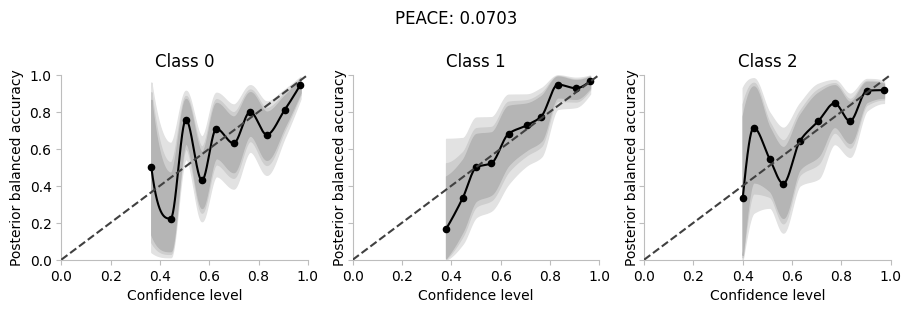

In [ ]:
axes = ridgereliability.plots.class_wise_river_reliability_diagram(y_probs, y_probs.argmax(axis=1), y_test, bins=15)

peace_metric = ridgereliability.metrics.class_wise_error(y_probs, y_probs.argmax(axis=1), y_test, base_error=ridgereliability.metrics.peace)
_ = plt.suptitle(f"PEACE: {peace_metric:.4f}")

In this particular example we can see that the classifier is well calibrated.

See the notebooks directory for more examples.